In [4]:
#Instalamos pytrends
!pip install pytrends
     
#Importamos las librerías que vamos a utilizar
import pandas as pd                        
from pytrends.request import TrendReq




[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Lista de palabras clave a analizar
lista_palabras = ["TheBridge", "Ironhack", "KeepCoding", "BootCamp"]

# Conectarse a Google Trends
pytrends = TrendReq(hl="es")

# Construir el payload de búsqueda
pytrends.build_payload(lista_palabras, cat=0, timeframe="2023-02-13 2023-05-22", geo="ES")

# Obtener los datos de tendencias
datos_tendencias = pytrends.interest_over_time()

# Mostrar los datos de tendencias
print(datos_tendencias)



            TheBridge  Ironhack  KeepCoding  BootCamp  isPartial
date                                                            
2023-02-13          0         0           0        61      False
2023-02-14         20        53          38        57      False
2023-02-15          0         0           0         0      False
2023-02-16          0         0           0        19      False
2023-02-17          0         0           0        81      False
...               ...       ...         ...       ...        ...
2023-05-16          0         0          17        44      False
2023-05-17          0         0           0        57      False
2023-05-18          0         0           0        57      False
2023-05-19          0        26          17        71      False
2023-05-20          0         0           0         0      False

[97 rows x 5 columns]


In [6]:
# Cantidad de valores de cada columna
cantidad_valores = datos_tendencias.count()
#print(cantidad_valores)

# Fecha con el mayor valor en cada columna
fecha_mayor_valor = datos_tendencias.idxmax()
print(fecha_mayor_valor)

# Agrupar por mes y obtener la suma de valores en cada mes
datos_tendencias_mes = datos_tendencias.resample('M').sum()
print(datos_tendencias_mes)


TheBridge    2023-05-05
Ironhack     2023-02-14
KeepCoding   2023-02-21
BootCamp     2023-03-11
isPartial    2023-02-13
dtype: datetime64[ns]
            TheBridge  Ironhack  KeepCoding  BootCamp  isPartial
date                                                            
2023-02-28         20       157         121       714          0
2023-03-31        135       233         335      1441          0
2023-04-30        166       176         193      1222          0
2023-05-31        138       233         132       973          0


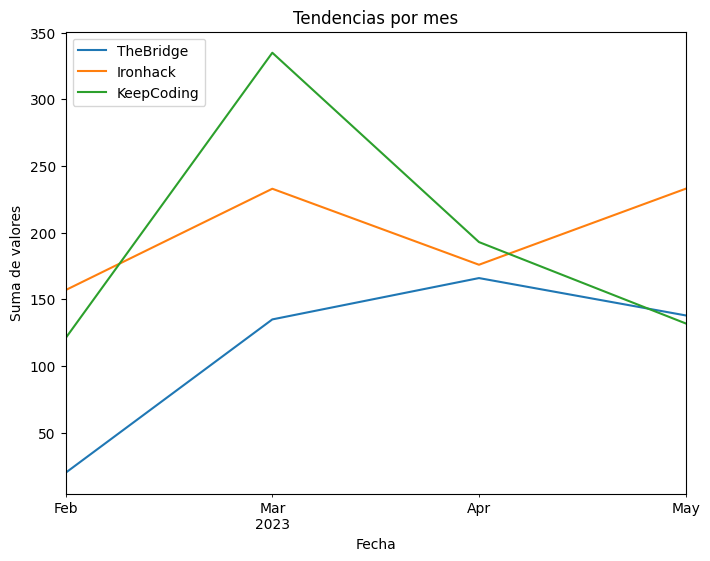

In [14]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Filtrar las palabras clave de interés
palabras_clave = ["TheBridge", "Ironhack", "KeepCoding"]
datos_tendencias_mes_filtrado = datos_tendencias_mes[palabras_clave]

# Gráfico de tendencias por mes
datos_tendencias_mes_filtrado.plot(kind='line', figsize=(8,6))
plt.title('Tendencias por mes')
plt.xlabel('Fecha')
plt.ylabel('Suma de valores')
plt.legend(loc='upper left')
plt.show()

In [15]:

# Crear la figura con un tamaño de 12 pulgadas de ancho por 8 pulgadas de alto
plt.figure(figsize=(12, 8))

# Crear el boxplot
ax = sns.boxplot(data=datos_tendencias, palette="Paired")

# Rotar las etiquetas del eje X
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Agregar etiquetas a los ejes
ax.set_xlabel('Features')
ax.set_ylabel('Affairs')

# Mostrar el gráfico
plt.show()

NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

In [19]:
#Explorar el dataset
# Estadísticos
datos_tendencias.describe()

# Tipos de los datos
datos_tendencias.dtypes

# Tipos de los datos y missings
datos_tendencias.info()

# Columnas del dataset
datos_tendencias.columns

# dimensiones del dataset
print("Filas:", datos_tendencias.shape[0])
print("Columnas:", datos_tendencias.shape[1])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97 entries, 2023-02-13 to 2023-05-20
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   TheBridge_Tech  97 non-null     int32
 1   TheBridge       97 non-null     int32
 2   Ironhack        97 non-null     int32
 3   KeepCoding      97 non-null     int32
 4   BootCamp        97 non-null     int32
 5   isPartial       97 non-null     bool 
dtypes: bool(1), int32(5)
memory usage: 2.7 KB
Filas: 97
Columnas: 6


<Axes: xlabel='date'>

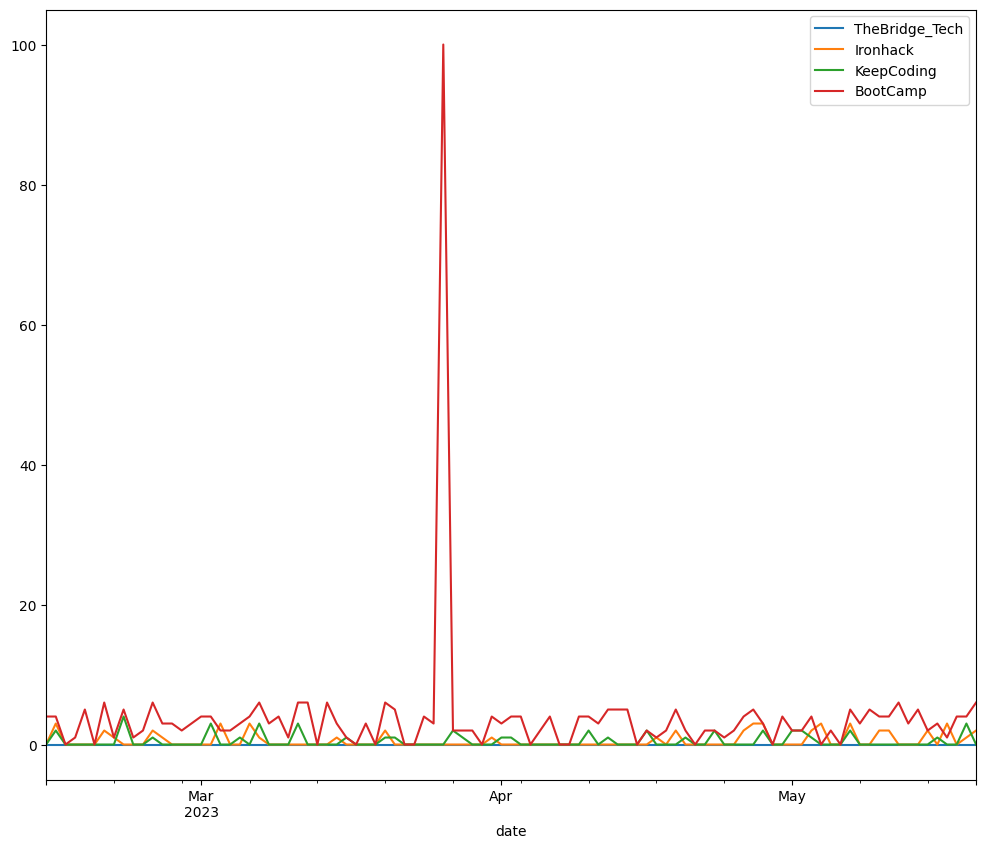

In [12]:
pytrends.interest_over_time()
grafico = pytrends.interest_over_time()
grafico.plot(figsize=(12, 10), y=lista_palabras)

In [13]:
pytrends.interest_by_region(resolution="COUNTRY")

,TheBridge_Tech,Ironhack,KeepCoding,BootCamp
geoName,,,,
Andalucía,0,9,0,91
Aragón,0,0,0,100
Canarias,0,0,0,100
Cantabria,0,0,0,100
Castilla y León,0,0,0,100
Castilla-La Mancha,0,0,0,100
Cataluña,0,16,4,80
Ceuta,0,0,0,0
Comunidad Valenciana,0,5,0,95


In [24]:
#Indicamos la consulta que queremos realizar
lista_palabras = ["BootCamp"]
   
#Pasamos todos los parámetros que queremos a la solicitud (filtrado)
pytrends.build_payload(lista_palabras, cat=0, timeframe="2023-02-13 2023-05-22", geo="ES")
    
#Ejecutamos pytrends.related_topics()
pytrends.related_topics()
    
#Indicamos que queremos los topics con un volumen creciente 
#durante el período de tiempo establecido
analisis_tendencia = pytrends.related_topics()
analisis_tendencia.get("BootCamp").get("rising")

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,237100,Aumento puntual,/trends/explore?q=/m/07zy4y&date=2023-02-13+20...,/m/07zy4y,Análisis de datos,Tema
1,176800,Aumento puntual,/trends/explore?q=/m/0bs2j8q&date=2023-02-13+2...,/m/0bs2j8q,Macrodatos,Tema
2,106650,Aumento puntual,/trends/explore?q=/g/121jnq1m&date=2023-02-13+...,/g/121jnq1m,Negocio,Tipo de organización
3,100450,Aumento puntual,/trends/explore?q=/m/019v9k&date=2023-02-13+20...,/m/019v9k,Título de grado,Título
4,79100,Aumento puntual,/trends/explore?q=/m/01hyh_&date=2023-02-13+20...,/m/01hyh_,Aprendizaje automático,Clasificación de software
5,350,+350 %,/trends/explore?q=/m/07sbkfb&date=2023-02-13+2...,/m/07sbkfb,Java,Lenguaje de programación
6,350,+350 %,/trends/explore?q=/g/11b7ccbfvs&date=2023-02-1...,/g/11b7ccbfvs,Barry's Bootcamp,Tema
7,180,+180 %,/trends/explore?q=/g/120_g8jl&date=2023-02-13+...,/g/120_g8jl,Diseño de experiencia de usuario,Tema
8,80,+80 %,/trends/explore?q=/m/05z1_&date=2023-02-13+202...,/m/05z1_,Python,Lenguaje de programación
9,80,+80 %,/trends/explore?q=/m/02htf&date=2023-02-13+202...,/m/02htf,Controlador de dispositivo,Tema


In [26]:
#Ejecutamos pytrends.related_topics()
pytrends.related_topics()
     
#Indicamos que queremos el top de topics en ese periodo
analisis_tendencia = pytrends.related_topics()
analisis_tendencia.get("BootCamp").get("top")

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/0cdvtf&date=2023-02-13+20...,/m/0cdvtf,Boot Camp,Software
1,73,73,True,/trends/explore?q=/m/0bq0mx&date=2023-02-13+20...,/m/0bq0mx,Bootcamp,Tema
2,61,61,True,/trends/explore?q=/m/03bzfgw&date=2023-02-13+2...,/m/03bzfgw,Boot camp,Deporte
3,51,51,True,/trends/explore?q=/m/04r_8&date=2023-02-13+202...,/m/04r_8,Microsoft Windows,Software
4,43,43,True,/trends/explore?q=/m/01mf_&date=2023-02-13+202...,/m/01mf_,Programación,Tema
5,42,42,True,/trends/explore?q=/m/026sq&date=2023-02-13+202...,/m/026sq,Dato,Tema
6,33,33,True,/trends/explore?q=/m/055yr&date=2023-02-13+202...,/m/055yr,macOS,Sistema operativo
7,32,32,True,/trends/explore?q=/m/0zd6&date=2023-02-13+2023...,/m/0zd6,Macintosh,Ordenador
8,23,23,True,/trends/explore?q=/m/06mq7&date=2023-02-13+202...,/m/06mq7,Ciencia,Campo de estudio
9,22,22,True,/trends/explore?q=/m/0120wbmx&date=2023-02-13+...,/m/0120wbmx,Windows 10,Sistema operativo


In [28]:
#Ejecutamos pytrends.related_queries()
pytrends.related_queries()
    
#Indicamos que queremos consultas relacionadas en aumento durante el periodo
#establecido
analisis_tendencia = pytrends.related_queries()
analisis_tendencia.get("BootCamp").get("rising")

,query,value
0,bootcamp ciberseguridad,110


In [29]:
#Ejecutamos pytrends.related_queries()
pytrends.related_queries()
    
#Indicamos que queremos el top de consultas relacionadas durante el periodo
#establecido
analisis_tendencia = pytrends.related_queries()
analisis_tendencia.get("BootCamp").get("top")

,query,value
0,bootcamp que es,100
1,open bootcamp,66
2,bootcamp mac,65
3,bootcamp programacion,37
4,bootcamp madrid,36
5,bootcamp ciberseguridad,26
6,que es un bootcamp,23
7,open bootcamp opiniones,10


In [34]:
pytrends.suggestions("BootCamp")
data_frame = pytrends.suggestions("BootCamp")
data_frame = pd.DataFrame(data_frame)
data_frame

,mid,title,type
0,/m/0bq0mx,Bootcamp,Tema
1,/g/11cm69tpmz,Coding bootcamp,Tema
2,/m/0cdvtf,Boot Camp,Software
3,/g/11crzgr97j,Zanna Van Dijk,Bloguera
4,/m/03bzfgw,Boot camp,Deporte


In [37]:

pytrends = TrendReq(hl="es")
lista_palabras = ["BootCamp"]
pytrends.build_payload(lista_palabras, timeframe="today 12-m", geo="ES")
pytrends.related_queries()

{'BootCamp': {'top':                       query  value
  0             open bootcamp    100
  1           que es bootcamp     70
  2              bootcamp mac     64
  3           bootcamp madrid     31
  4     bootcamp programacion     31
  5       bootcamp windows 10     30
  6        bootcamp barcelona     28
  7              data science     17
  8                 boot camp     17
  9                  ironhack     16
  10       que es un bootcamp     14
  11                bootcamps     12
  12                    udemy     11
  13  open bootcamp opiniones     10
  14               the bridge      9
  15     full stack developer      9
  16              upgrade hub      8
  17                 le wagon      7
  18         bootcamp deporte      6
  19        bootcamp gratuito      6
  20               keepcoding      6
  21             openbootcamp      4
  22              thepowermba      3
  23                   adalab      2
  24             bbk bootcamp      2,
  'rising':       